# Ensemble Learning (Voting Classifiers)

# Import, Visualize and Split the MAKE_MOONS dataset

### Import

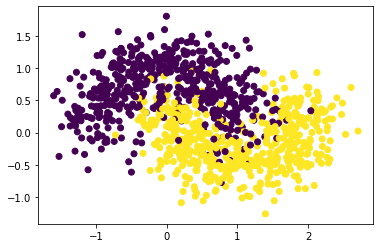

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

### Visualize

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

# Train and Visualize and Predict with the BaggingClassifier

### train

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, 
    max_samples=100, bootstrap=True, n_jobs=-1)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

# Train and Visualize and Predict with the BaggingRegressor

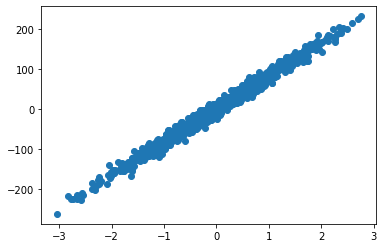

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=0)
plt.scatter(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

array([[ 1.88315070e+00],
       [-1.14746865e+00],
       [ 1.07819730e+00],
       [ 1.92953205e+00],
       [ 7.77490356e-01],
       [ 4.01499055e-01],
       [ 1.03440989e+00],
       [ 2.79924599e-01],
       [-1.22662166e+00],
       [-3.19328417e-01],
       [ 1.54947426e-01],
       [-1.05188010e+00],
       [ 2.22594433e+00],
       [-3.61599281e-01],
       [ 3.18727653e-01],
       [-3.94849514e-01],
       [-6.57926093e-01],
       [ 1.06458514e+00],
       [ 6.48561063e-02],
       [-1.10489405e-01],
       [-4.61584605e-01],
       [-8.59307670e-02],
       [ 2.23843563e-01],
       [-3.09114445e-01],
       [-8.87180942e-01],
       [ 8.75512414e-02],
       [-4.37820045e-01],
       [-3.04614305e+00],
       [ 8.00297949e-01],
       [ 1.07774381e+00],
       [ 2.01125668e+00],
       [ 6.98457149e-01],
       [ 1.65955080e+00],
       [-8.54095739e-01],
       [-1.15618243e+00],
       [ 8.20247837e-01],
       [ 2.42117961e-01],
       [ 3.65848788e-01],
       [-2.2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of iterations for computing expectations
n_train = 700  # Size of the training set
n_test = 300   # Size of the test set
noise = 0.1    # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor())),
]

n_estimators = len(estimators)

Tree: 208.8958 (error) = 208.8958 (bias^2)  + 0.0000 (var) + 5826.2347 (noise)
Bagging(Tree): 155.3183 (error) = 149.8816 (bias^2)  + 5.4367 (var) + 5826.2347 (noise)


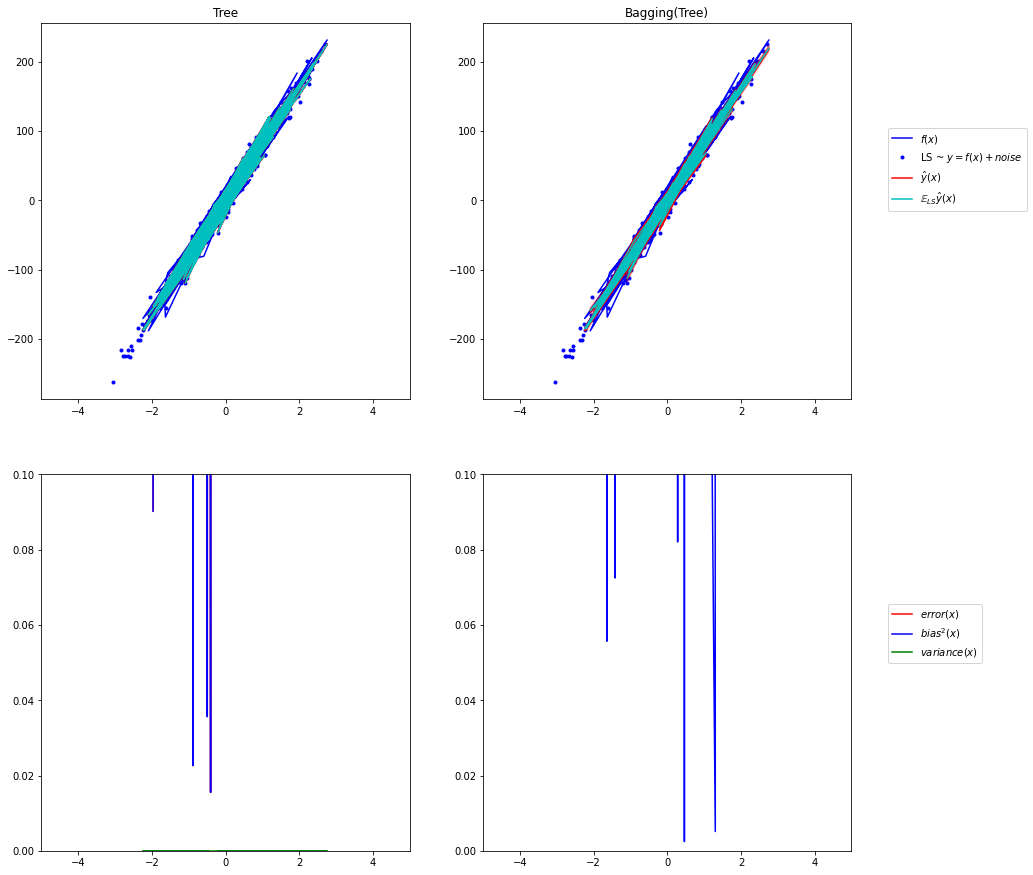

In [7]:
# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    ## Compute predictions
    y_predict = np.zeros((n_test, n_repeat))
    for i in range(n_repeat):
        estimator.fit(X_train, y_train)
        y_predict[:, i] = estimator.predict(X_test)

        
    ## Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)
    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:] - y_predict[:, i]) ** 2
    
    y_error /= n_repeat * n_repeat
    y_noise = np.var(y_test)
    y_bias = (y_test - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    ## Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, y_test, "b", label="$f(x)$")
    plt.plot(X_train, y_train, ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$")
    plt.plot(X_test, y_var, "g", label="$variance(x)$")
#     plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=2, top=3)
plt.show()